# Data Analytics Report  
**Theme:** Lifestyle, Economy, Health, and Food Analysis  

This notebook explores multiple domains (lifestyle, economy, health, food) and highlights insights using graphs.  
The aim is to transform raw data into a meaningful **story that explains how people live, spend, eat, and manage health**.  


In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             ## IMPORTING LIBRARIES.
import seaborn as sns


In [361]:
df = pd.read_csv("/content/NFHS_5_Factsheets_Data.csv")              ## LOADING DATA.
df

,States/UTs,Area,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Women (age 15-49 years) having a mobile phone that they themselves use (%),Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%),Ever-married women age 18-49 years who have ever experienced spousal violence27 (%),Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%),Young women age 18-29 years who experienced sexual violence by age 18 (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%),Unnamed: 136
0,India,Urban,160138,179535,26420,82.5,23.1,985.0,924,93.3,...,69.4,89.4,24.2,2.5,1.1,5.4,28.8,0.6,16.5,NaN
1,India,Rural,476561,544580,75419,66.8,28.1,1037.0,931,87.5,...,46.6,72.3,31.6,3.4,1.6,10.5,42.7,1.6,19.9,NaN
2,India,Total,636699,724115,101839,71.8,26.5,1020.0,929,89.1,...,54.0,77.3,29.3,3.1,1.5,8.9,38.0,1.3,18.8,NaN
3,Andaman & Nicobar Islands,Urban,527,557,85,86.5,22.7,1023.0,941,96.9,...,80.8,98.5,23.2,(0.0),1.4,15.0,44.7,0.7,33.8,NaN
4,Andaman & Nicobar Islands,Rural,2097,1840,282,81.8,19.7,929.0,891,97.8,...,80.9,99.1,13.2,0.5,2.2,41.1,66.4,7.6,41.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Uttarakhand,Rural,9811,10694,1270,72.0,27.1,1052.0,937,91.8,...,55.7,89.7,16.2,2.0,0.4,5.4,36.8,0.4,27.5,NaN
107,Uttarakhand,Total,12169,13280,1586,75.2,26.3,1016.0,984,91.9,...,60.9,91.2,15.1,2.1,0.3,4.6,33.7,0.3,25.5,NaN
108,West Bengal,Urban,5442,6358,942,84.1,20.2,1016.0,921,98.1,...,71.9,91.2,22.9,2.3,6.7,8.0,44.7,0.8,18.9,NaN
109,West Bengal,Rural,12745,15050,2079,73.3,25.1,1065.0,993,98.3,...,39.1,79.7,28.7,4.0,10.9,12.3,49.9,1.3,17.7,NaN


In [362]:
#  Cell 3: Check missing values

print("Missing values per column:\n", df.isnull().sum())
print("\nMissing values (%):\n", (df.isnull().sum() / len(df)) * 100)
print("\nShape:", df.shape)


Missing values per column:
 States/UTs                                                        0
Area                                                              0
Number of Households surveyed                                     0
Number of Women age 15-49 years interviewed                       0
Number of Men age 15-54 years interviewed                         0
                                                               ... 
Women age 15 years and above who use any kind of tobacco (%)      0
Men age 15 years and above who use any kind of tobacco (%)        0
Women age 15 years and above who consume alcohol (%)              0
Men age 15 years and above who consume alcohol (%)                0
Unnamed: 136                                                    111
Length: 137, dtype: int64

Missing values (%):
 States/UTs                                                        0.0
Area                                                              0.0
Number of Households surveyed       

### 🔍 Checking Missing Values  

In this step, we examine the dataset for missing values:  

- **Count of missing values per column** → Helps us identify which features have null or empty entries.  
- **Percentage of missing values** → Shows the proportion of missing data compared to the entire dataset, so we can judge the severity.  
- **Shape of the dataset** → Displays the total number of rows and columns, giving us a quick idea of dataset size.  

✅ This step is crucial before moving to cleaning or preprocessing, as missing values can affect analysis and model performance.  


In [363]:
# 📌 Cell 4: Handle NaN values (only numeric columns → fill with mean)

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].mean())

print("✅ After filling NaN values → total NaN:", df.isnull().sum().sum())




✅ After filling NaN values → total NaN: 111


In [364]:
# 📌 Cell 5: Drop last useless column (if extra/unnamed column exists)
df = df.drop(df.columns[-1], axis=1)
print("New shape:", df.shape)



New shape: (111, 136)


In [365]:
# 📌 Cell 6: Convert percentage/object columns to numeric
df = df.apply(pd.to_numeric, errors="ignore")

for col in df.columns:
    if df[col].dtype == "object" and col not in ["States/UTs", "Area"]:
        df[col] = pd.to_numeric(df[col].str.replace("%","",regex=False), errors="coerce")

df = df.fillna(df.mean(numeric_only=True))
print(df.dtypes.head(20))


States/UTs                                                                                  object
Area                                                                                        object
Number of Households surveyed                                                                int64
Number of Women age 15-49 years interviewed                                                  int64
Number of Men age 15-54 years interviewed                                                    int64
Female population age 6 years and above who ever attended school (%)                       float64
Population below age 15 years (%)                                                          float64
 Sex ratio of the total population (females per 1,000 males)                               float64
Sex ratio at birth for children born in the last five years (females per 1,000 males)      float64
Children under age 5 years whose birth was registered with the civil authority (%)         float64
Deaths in 

/tmp/ipython-input-4018774961.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


### 📊 Selecting Important Features


In [366]:


# 📌 Cell 7: Select important features for analysis
wanted_features = [
    "States/UTs",
    # --- Demographics & Education ---
    "Female population age 6 years and above who ever attended school (%)",
    "Population below age 15 years (%)",
    " Sex ratio of the total population (females per 1,000 males)",
    "Sex ratio at birth for children born in the last five years (females per 1,000 males)",
    "Women (age 15-49) who are literate4 (%)",
    "Men (age 15-49) who are literate4 (%)",
    "Women (age 15-49)  with 10 or more years of schooling (%)",
    "Men (age 15-49)  with 10 or more years of schooling (%)",
    # --- Fertility & Family Planning ---
    "Total Fertility Rate (number of children per woman)",
    "Women age 20-24 years married before age 18 years (%)",
    "Men age 25-29 years married before age 21 years (%)",
    "Women age 15-19 years who were already mothers or pregnant at the time of the survey (%)",
    "Adolescent fertility rate for women age 15-19 years5",
    "Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any method6 (%)",
    "Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any modern method6 (%)",
    "Total Unmet need for Family Planning (Currently Married Women Age 15-49  years)7 (%)",
    # --- Maternal & Child Health ---
    "Mothers who had an antenatal check-up in the first trimester  (for last birth in the 5 years before the survey) (%)",
    "Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)",
    "Institutional births (in the 5 years before the survey) (%)",
    "Births attended by skilled health personnel (in the 5 years before the survey)10 (%)",
    "Births delivered by caesarean section (in the 5 years before the survey) (%)",
    "Children age 12-23 months fully vaccinated based on information from either vaccination card or mother's recall11 (%)",
    "Children under 5 years who are stunted (height-for-age)18 (%)",
    "Children under 5 years who are wasted (weight-for-height)18 (%)",
    "Children under 5 years who are underweight (weight-for-age)18 (%)",
    "Children under 5 years who are overweight (weight-for-height)20 (%)",
    "Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)",
    # --- Adult Health & Nutrition ---
    "Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)",
    "Men (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)",
    "Women (age 15-49 years) who are overweight or obese (BMI ?25.0 kg/m2)21 (%)",
    "Men (age 15-49 years) who are overweight or obese (BMI ?25.0 kg/m2) (%)",
    "Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)",
    "Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)",
    "All women age 15-49 years who are anaemic22 (%)",
    "Men age 15-49 years who are anaemic (<13.0 g/dl)22 (%)",
    "Women age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%)",
    "Men age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%)",
    "Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)",
    "Men age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level  or taking medicine to control blood sugar level23 (%)",
    # --- Social & Empowerment ---
    "Currently married women (age 15-49 years) who usually participate in three household decisions25 (%)",
    "Women (age 15-49 years) who worked in the last 12 months and were paid in cash (%)",
    "Women (age 15-49 years) owning a house and/or land (alone or jointly with others) (%)",
    "Women (age 15-49 years) having a bank or savings account that they themselves use (%)",
    "Women (age 15-49 years) having a mobile phone that they themselves use (%)",
    "Ever-married women age 18-49 years who have ever experienced spousal violence27 (%)",
    # --- Lifestyle ---
    "Women age 15 years and above who use any kind of tobacco (%)",
    "Men age 15 years and above who use any kind of tobacco (%)",
    "Women age 15 years and above who consume alcohol (%)",

]

df_selected = df[wanted_features]
df_selected


,States/UTs,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Women (age 15-49) who are literate4 (%),Men (age 15-49) who are literate4 (%),Women (age 15-49) with 10 or more years of schooling (%),Men (age 15-49) with 10 or more years of schooling (%),Total Fertility Rate (number of children per woman),...,Men age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%),Currently married women (age 15-49 years) who usually participate in three household decisions25 (%),Women (age 15-49 years) who worked in the last 12 months and were paid in cash (%),Women (age 15-49 years) owning a house and/or land (alone or jointly with others) (%),Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Ever-married women age 18-49 years who have ever experienced spousal violence27 (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%)
0,India,82.5,23.1,985.0,924.0,83.0,89.6,56.3,62.1,1.6,...,17.9,91.0,25.0,38.3,80.9,69.4,24.2,5.4,28.8,0.6
1,India,66.8,28.1,1037.0,931.0,65.9,81.5,33.7,43.7,2.1,...,14.5,87.7,25.6,45.7,77.4,46.6,31.6,10.5,42.7,1.6
2,India,71.8,26.5,1020.0,929.0,71.5,84.4,41.0,50.2,2.0,...,15.6,88.7,25.4,43.3,78.6,54.0,29.3,8.9,38.0,1.3
3,Andaman & Nicobar Islands,86.5,22.7,1023.0,941.0,86.6,89.3,59.7,59.4,1.4,...,19.4,93.0,34.7,10.9,88.5,80.8,23.2,15.0,44.7,0.7
4,Andaman & Nicobar Islands,81.8,19.7,929.0,891.0,85.6,94.7,47.6,47.7,1.2,...,17.1,95.5,17.1,19.4,89.8,80.9,13.2,41.1,66.4,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Uttarakhand,72.0,27.1,1052.0,937.0,79.8,93.2,46.0,58.7,1.9,...,13.3,90.6,22.2,25.1,79.8,55.7,16.2,5.4,36.8,0.4
107,Uttarakhand,75.2,26.3,1016.0,984.0,81.6,92.9,50.4,59.8,1.9,...,14.3,91.0,21.6,24.6,80.2,60.9,15.1,4.6,33.7,0.3
108,West Bengal,84.1,20.2,1016.0,921.0,83.4,89.8,47.6,51.4,1.4,...,23.1,96.1,20.2,24.7,82.9,71.9,22.9,8.0,44.7,0.8
109,West Bengal,73.3,25.1,1065.0,993.0,72.5,77.8,25.9,26.9,1.7,...,20.4,85.8,20.2,22.5,73.2,39.1,28.7,12.3,49.9,1.3


In [367]:
# 📌 Cell 8: Create combined indicators
df_selected['Overall Literacy (%)'] = df[[
    "Women (age 15-49) who are literate4 (%)",
    "Men (age 15-49) who are literate4 (%)"
]].mean(axis=1)

df_selected['Higher Education (%)'] = df[[
    "Women (age 15-49)  with 10 or more years of schooling (%)",
    "Men (age 15-49)  with 10 or more years of schooling (%)"
]].mean(axis=1)

df_selected['Female School Attendance (%)'] = df[
    "Female population age 6 years and above who ever attended school (%)"
]

df_selected.head()



/tmp/ipython-input-670771415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Overall Literacy (%)'] = df[[
/tmp/ipython-input-670771415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Higher Education (%)'] = df[[
/tmp/ipython-input-670771415.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,States/UTs,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Women (age 15-49) who are literate4 (%),Men (age 15-49) who are literate4 (%),Women (age 15-49) with 10 or more years of schooling (%),Men (age 15-49) with 10 or more years of schooling (%),Total Fertility Rate (number of children per woman),...,Women (age 15-49 years) owning a house and/or land (alone or jointly with others) (%),Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Ever-married women age 18-49 years who have ever experienced spousal violence27 (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Overall Literacy (%),Higher Education (%),Female School Attendance (%)
0,India,82.5,23.1,985.0,924.0,83.0,89.6,56.3,62.1,1.6,...,38.3,80.9,69.4,24.2,5.4,28.8,0.6,86.30,59.20,82.5
1,India,66.8,28.1,1037.0,931.0,65.9,81.5,33.7,43.7,2.1,...,45.7,77.4,46.6,31.6,10.5,42.7,1.6,73.70,38.70,66.8
2,India,71.8,26.5,1020.0,929.0,71.5,84.4,41.0,50.2,2.0,...,43.3,78.6,54.0,29.3,8.9,38.0,1.3,77.95,45.60,71.8
3,Andaman & Nicobar Islands,86.5,22.7,1023.0,941.0,86.6,89.3,59.7,59.4,1.4,...,10.9,88.5,80.8,23.2,15.0,44.7,0.7,87.95,59.55,86.5
4,Andaman & Nicobar Islands,81.8,19.7,929.0,891.0,85.6,94.7,47.6,47.7,1.2,...,19.4,89.8,80.9,13.2,41.1,66.4,7.6,90.15,47.65,81.8


In [368]:
# 📌 Cell 9: Final dataset info
print(df_selected.shape)
print(df_selected.info())
print(df_selected.describe())


(111, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 52 columns):
 #   Column                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                            --------------  -----  
 0   States/UTs                                                                                                                                                        111 non-null    object 
 1   Female population age 6 years and above who ever attended school (%)                                                                                              111 non-null    float64
 2   Population below age 15 years (%)                                                                                   

### 🗂️ Fixing State/UT Names  

- The `States/UTs` column was previously dropped while selecting features.  
- Now, we are re-adding the column manually by assigning a **list of state and union territory names**, each repeated **3 times** to match the dataset structure (likely corresponding to different years or categories for each state).  

#### ✅ Steps in this cell:
1. **Drop the old column** `States/UTs` from `df_selected`.  
2. **Create a new list** `states` that contains all state and UT names (India + 36 States/UTs), each repeated three times.  
3. **Assign this list** back to the DataFrame column `df_selected['States/UTs']`.  
4. Finally, display the updated dataframe.  

🔹 This ensures that the dataset has the correct state/UT labels aligned with the features.  


In [369]:
df_selected = df_selected.drop(columns=['States/UTs'])

states = [
    'India', 'India', 'India',
    'Andaman & Nicobar Islands', 'Andaman & Nicobar Islands', 'Andaman & Nicobar Islands',
    'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh',
    'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh',
    'Assam', 'Assam', 'Assam',
    'Bihar', 'Bihar', 'Bihar',
    'Chandigarh', 'Chandigarh', 'Chandigarh',
    'Chhattisgarh', 'Chhattisgarh', 'Chhattisgarh',
    'Dadra & Nagar Haveli and Daman & Diu', 'Dadra & Nagar Haveli and Daman & Diu', 'Dadra & Nagar Haveli and Daman & Diu',
    'Delhi', 'Delhi', 'Delhi',
    'Goa', 'Goa', 'Goa',
    'Gujarat', 'Gujarat', 'Gujarat',
    'Haryana', 'Haryana', 'Haryana',
    'Himachal Pradesh', 'Himachal Pradesh', 'Himachal Pradesh',
    'Jammu & Kashmir', 'Jammu & Kashmir', 'Jammu & Kashmir',
    'Jharkhand', 'Jharkhand', 'Jharkhand',
    'Karnataka', 'Karnataka', 'Karnataka',
    'Kerala', 'Kerala', 'Kerala',
    'Ladakh', 'Ladakh', 'Ladakh',
    'Lakshadweep', 'Lakshadweep', 'Lakshadweep',
    'Madhya Pradesh', 'Madhya Pradesh', 'Madhya Pradesh',
    'Maharashtra', 'Maharashtra', 'Maharashtra',
    'Manipur', 'Manipur', 'Manipur',
    'Meghalaya', 'Meghalaya', 'Meghalaya',
    'Mizoram', 'Mizoram', 'Mizoram',
    'Nagaland', 'Nagaland', 'Nagaland',
    'Odisha', 'Odisha', 'Odisha',
    'Puducherry', 'Puducherry', 'Puducherry',
    'Punjab', 'Punjab', 'Punjab',
    'Rajasthan', 'Rajasthan', 'Rajasthan',
    'Sikkim', 'Sikkim', 'Sikkim',
    'Tamil Nadu', 'Tamil Nadu', 'Tamil Nadu',
    'Telangana', 'Telangana', 'Telangana',
    'Tripura', 'Tripura', 'Tripura',
    'Uttar Pradesh', 'Uttar Pradesh', 'Uttar Pradesh',
    'Uttarakhand', 'Uttarakhand', 'Uttarakhand',
    'West Bengal', 'West Bengal', 'West Bengal'
]

df_selected['States/UTs'] = states
df_selected


,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Women (age 15-49) who are literate4 (%),Men (age 15-49) who are literate4 (%),Women (age 15-49) with 10 or more years of schooling (%),Men (age 15-49) with 10 or more years of schooling (%),Total Fertility Rate (number of children per woman),Women age 20-24 years married before age 18 years (%),...,Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Ever-married women age 18-49 years who have ever experienced spousal violence27 (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Overall Literacy (%),Higher Education (%),Female School Attendance (%),States/UTs
0,82.5,23.1,985.0,924.0,83.0,89.6,56.3,62.1,1.6,14.7,...,80.9,69.4,24.2,5.4,28.8,0.6,86.30,59.20,82.5,India
1,66.8,28.1,1037.0,931.0,65.9,81.5,33.7,43.7,2.1,27.0,...,77.4,46.6,31.6,10.5,42.7,1.6,73.70,38.70,66.8,India
2,71.8,26.5,1020.0,929.0,71.5,84.4,41.0,50.2,2.0,23.3,...,78.6,54.0,29.3,8.9,38.0,1.3,77.95,45.60,71.8,India
3,86.5,22.7,1023.0,941.0,86.6,89.3,59.7,59.4,1.4,17.4,...,88.5,80.8,23.2,15.0,44.7,0.7,87.95,59.55,86.5,Andaman & Nicobar Islands
4,81.8,19.7,929.0,891.0,85.6,94.7,47.6,47.7,1.2,15.3,...,89.8,80.9,13.2,41.1,66.4,7.6,90.15,47.65,81.8,Andaman & Nicobar Islands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,72.0,27.1,1052.0,937.0,79.8,93.2,46.0,58.7,1.9,9.8,...,79.8,55.7,16.2,5.4,36.8,0.4,86.50,52.35,72.0,Uttarakhand
107,75.2,26.3,1016.0,984.0,81.6,92.9,50.4,59.8,1.9,9.8,...,80.2,60.9,15.1,4.6,33.7,0.3,87.25,55.10,75.2,Uttarakhand
108,84.1,20.2,1016.0,921.0,83.4,89.8,47.6,51.4,1.4,26.2,...,82.9,71.9,22.9,8.0,44.7,0.8,86.60,49.50,84.1,West Bengal
109,73.3,25.1,1065.0,993.0,72.5,77.8,25.9,26.9,1.7,48.1,...,73.2,39.1,28.7,12.3,49.9,1.3,75.15,26.40,73.3,West Bengal


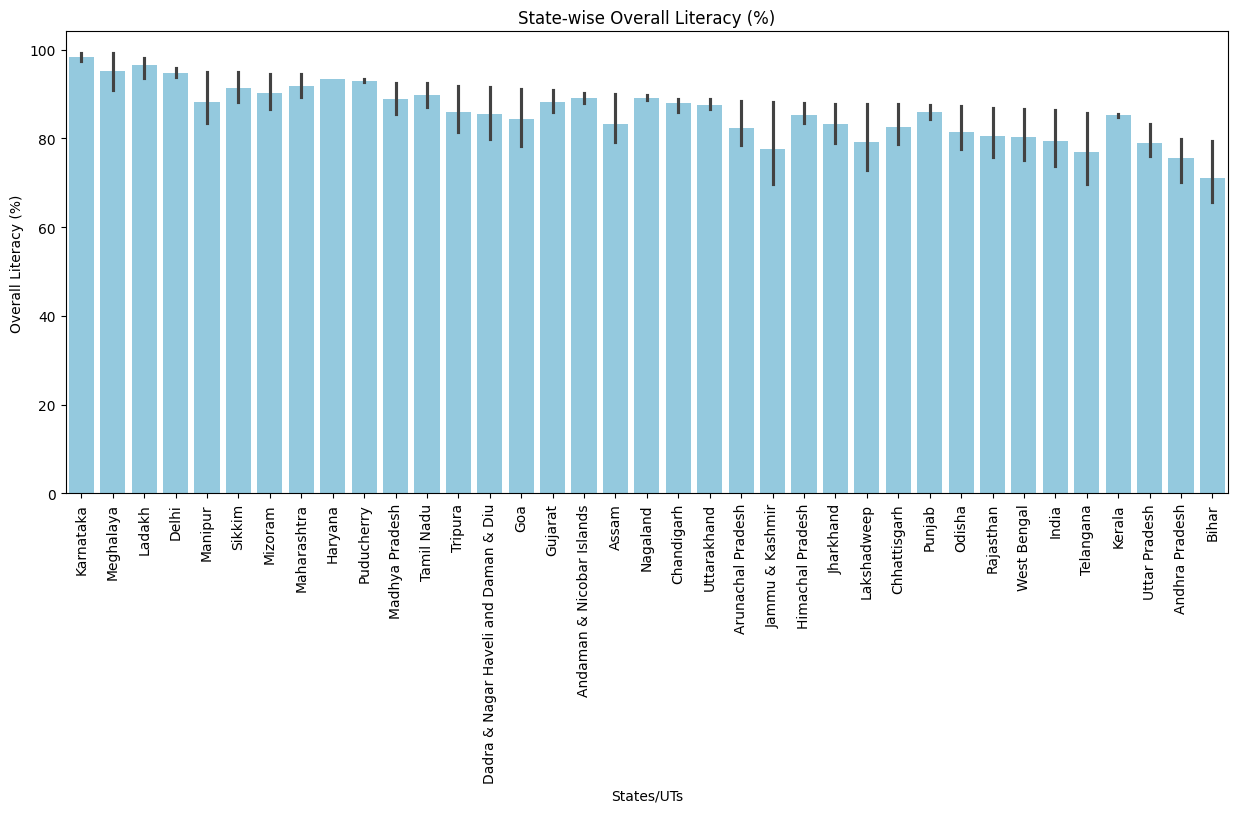

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.barplot(
    x="States/UTs",
    y="Overall Literacy (%)",
    data=df_selected.sort_values("Overall Literacy (%)", ascending=False),
    color="skyblue"
)
plt.xticks(rotation=90)
plt.title("State-wise Overall Literacy (%)")
plt.show()



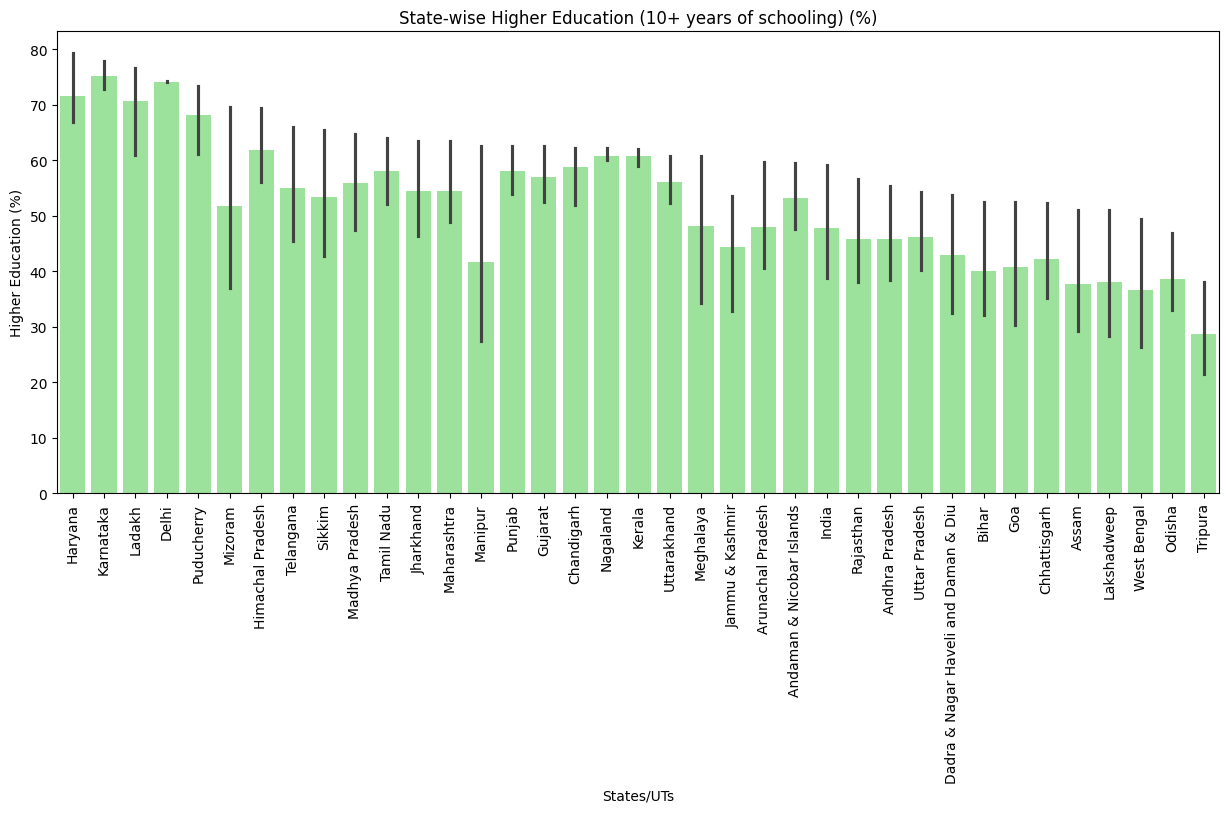

In [371]:
plt.figure(figsize=(15,6))
sns.barplot(
    x="States/UTs",
    y="Higher Education (%)",
    data=df_selected.sort_values("Higher Education (%)", ascending=False),
    color="lightgreen"
)
plt.xticks(rotation=90)
plt.title("State-wise Higher Education (10+ years of schooling) (%)")
plt.show()


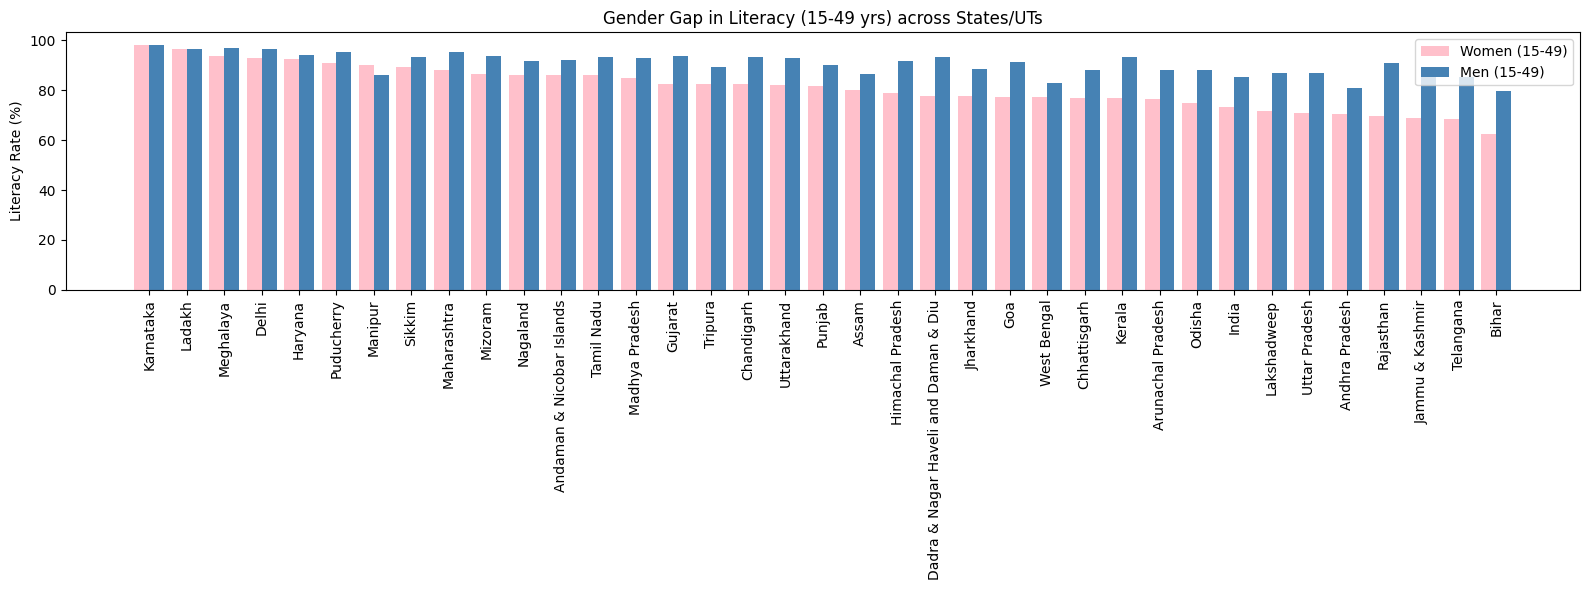

In [372]:
# Drop duplicates by keeping the mean of numeric values
df_unique = df_selected.groupby("States/UTs", as_index=False).mean(numeric_only=True)

# Now sort by women literacy
df_sorted = df_unique.sort_values("Women (age 15-49) who are literate4 (%)", ascending=False)

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(df_sorted))  # positions
width = 0.4

plt.figure(figsize=(16,6))

# Women bars
plt.bar(x - width/2,
        df_sorted["Women (age 15-49) who are literate4 (%)"],
        width=width, label="Women (15-49)", color="pink")

# Men bars
plt.bar(x + width/2,
        df_sorted["Men (age 15-49) who are literate4 (%)"],
        width=width, label="Men (15-49)", color="steelblue")

# X-axis
plt.xticks(x, df_sorted["States/UTs"], rotation=90)
plt.ylabel("Literacy Rate (%)")
plt.title("Gender Gap in Literacy (15-49 yrs) across States/UTs")
plt.legend()

plt.tight_layout()
plt.show()


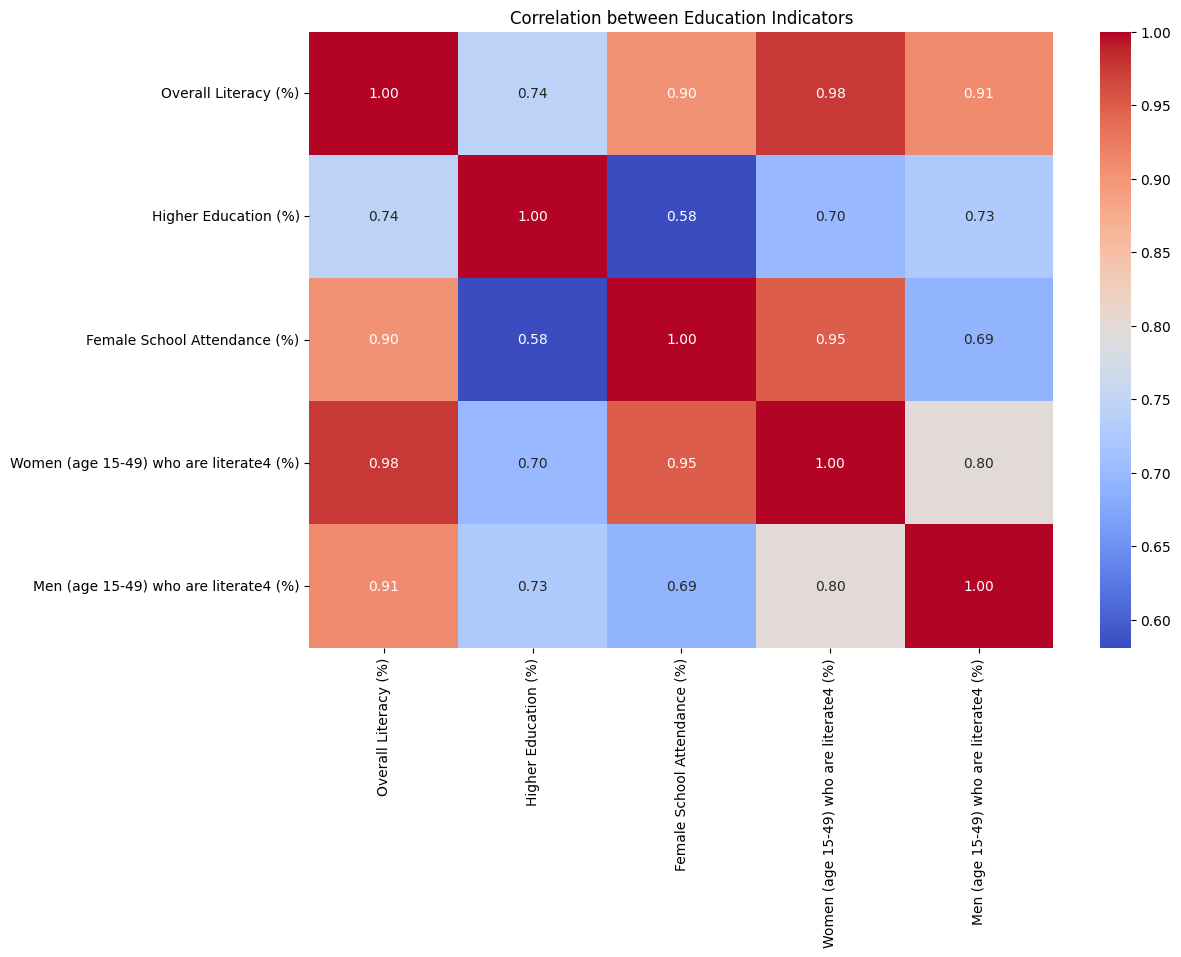

In [373]:
education_cols = [
    "Overall Literacy (%)",
    "Higher Education (%)",
    "Female School Attendance (%)",
    "Women (age 15-49) who are literate4 (%)",
    "Men (age 15-49) who are literate4 (%)"
]

plt.figure(figsize=(12,8))
sns.heatmap(df_selected[education_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Education Indicators")
plt.show()


/tmp/ipython-input-2879892004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


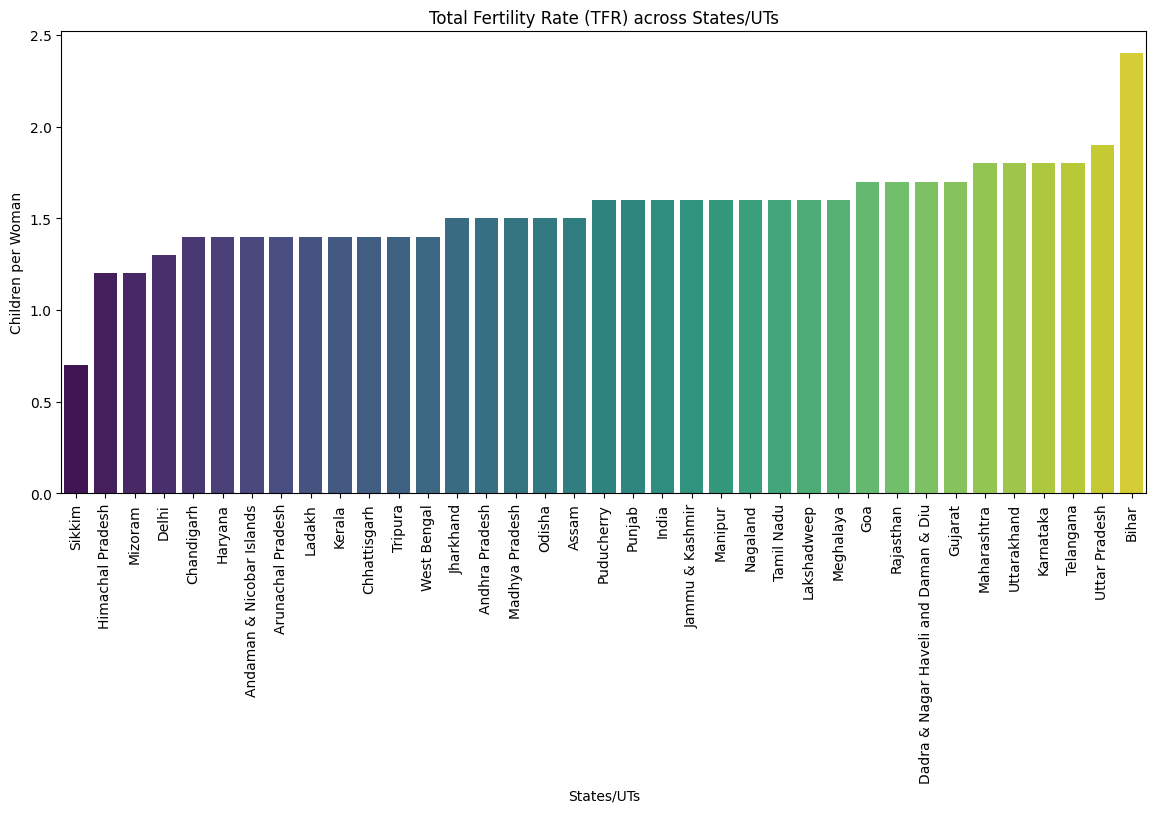

In [374]:
plt.figure(figsize=(14,6))
df_sorted = df_selected.drop_duplicates(subset="States/UTs").sort_values("Total Fertility Rate (number of children per woman)", ascending=True)

sns.barplot(
    x="States/UTs",
    y="Total Fertility Rate (number of children per woman)",
    data=df_sorted,
    palette="viridis"
)

plt.xticks(rotation=90)
plt.ylabel("Children per Woman")
plt.title("Total Fertility Rate (TFR) across States/UTs")
plt.show()


/tmp/ipython-input-4066957291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


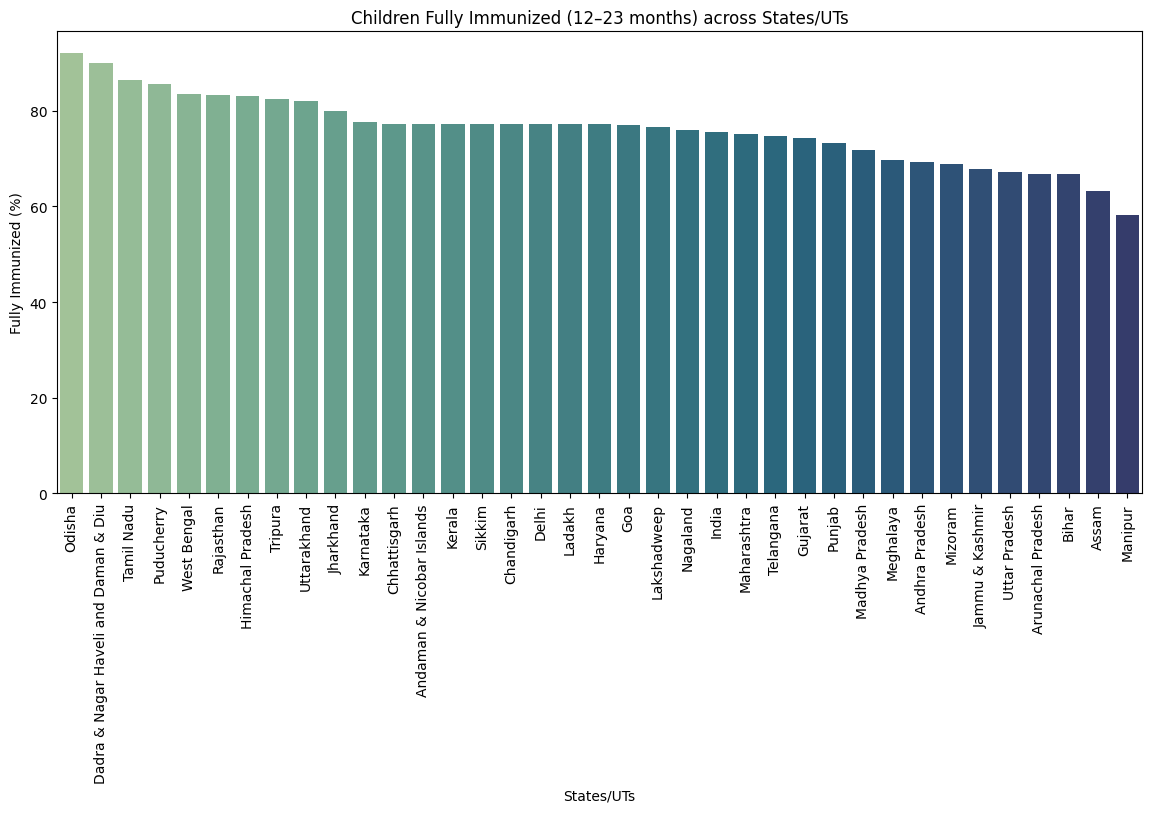

In [375]:
plt.figure(figsize=(14,6))
df_sorted = df_selected.drop_duplicates(subset="States/UTs").sort_values(
    "Children age 12-23 months fully vaccinated based on information from either vaccination card or mother's recall11 (%)", ascending=False
)

sns.barplot(
    x="States/UTs",
    y="Children age 12-23 months fully vaccinated based on information from either vaccination card or mother's recall11 (%)",
    data=df_sorted,
    palette="crest"
)
plt.xticks(rotation=90)
plt.ylabel("Fully Immunized (%)")
plt.title("Children Fully Immunized (12–23 months) across States/UTs")
plt.show()


/tmp/ipython-input-211423722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


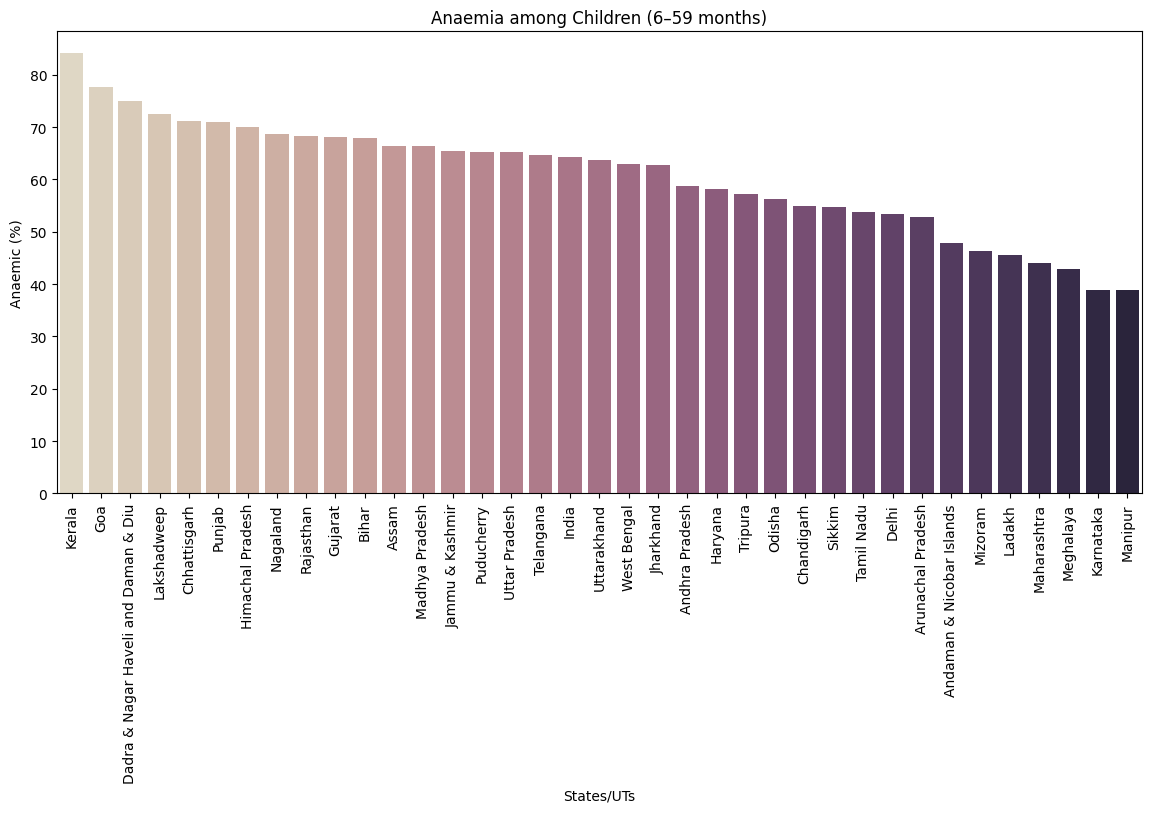

In [376]:
plt.figure(figsize=(14,6))
df_sorted = df_selected.drop_duplicates(subset="States/UTs").sort_values(
    "Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)", ascending=False
)

sns.barplot(
    x="States/UTs",
    y="Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)",
    data=df_sorted,
    palette="ch:s=-.2,r=.6"
)
plt.xticks(rotation=90)
plt.ylabel("Anaemic (%)")
plt.title("Anaemia among Children (6–59 months)")
plt.show()



/tmp/ipython-input-1418951635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


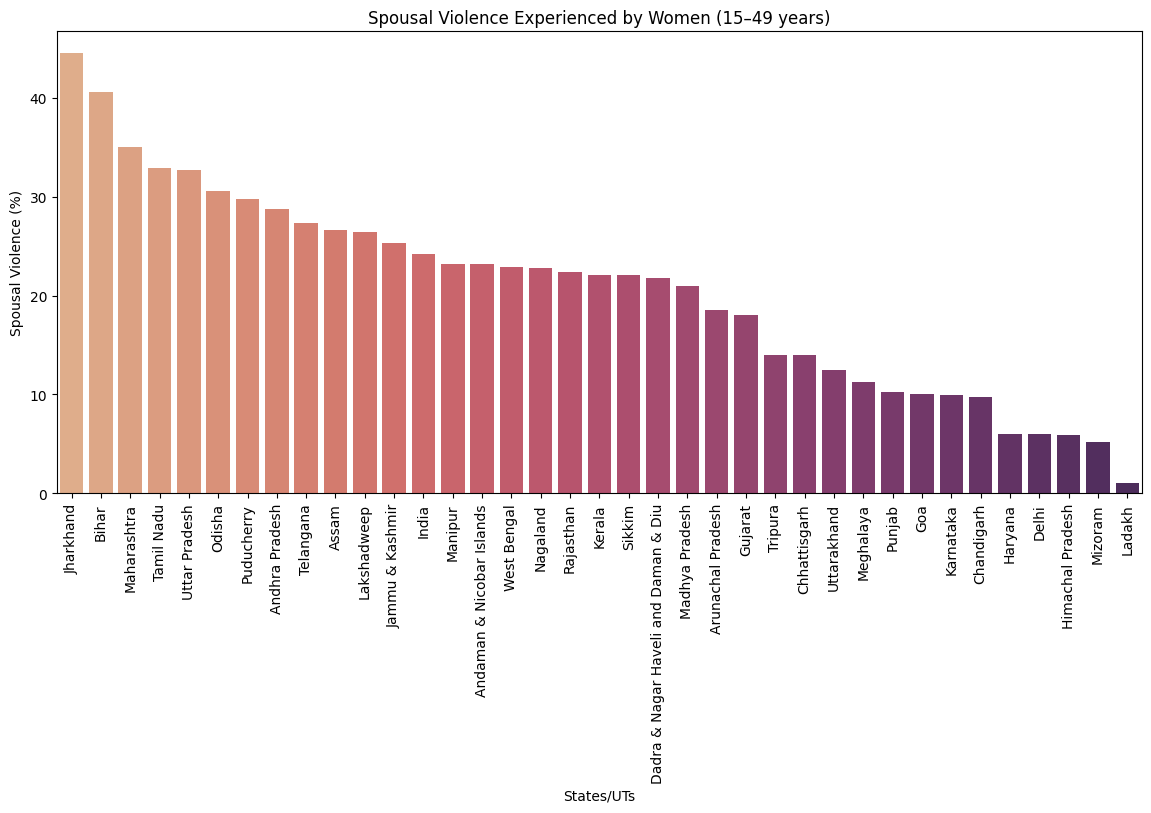

In [377]:
plt.figure(figsize=(14,6))
df_sorted = df_selected.drop_duplicates(subset="States/UTs").sort_values(
    "Ever-married women age 18-49 years who have ever experienced spousal violence27 (%)", ascending=False
)

sns.barplot(
    x="States/UTs",
    y="Ever-married women age 18-49 years who have ever experienced spousal violence27 (%)",
    data=df_sorted,
    palette="flare"
)
plt.xticks(rotation=90)
plt.ylabel("Spousal Violence (%)")
plt.title("Spousal Violence Experienced by Women (15–49 years)")
plt.show()


/tmp/ipython-input-2288652562.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


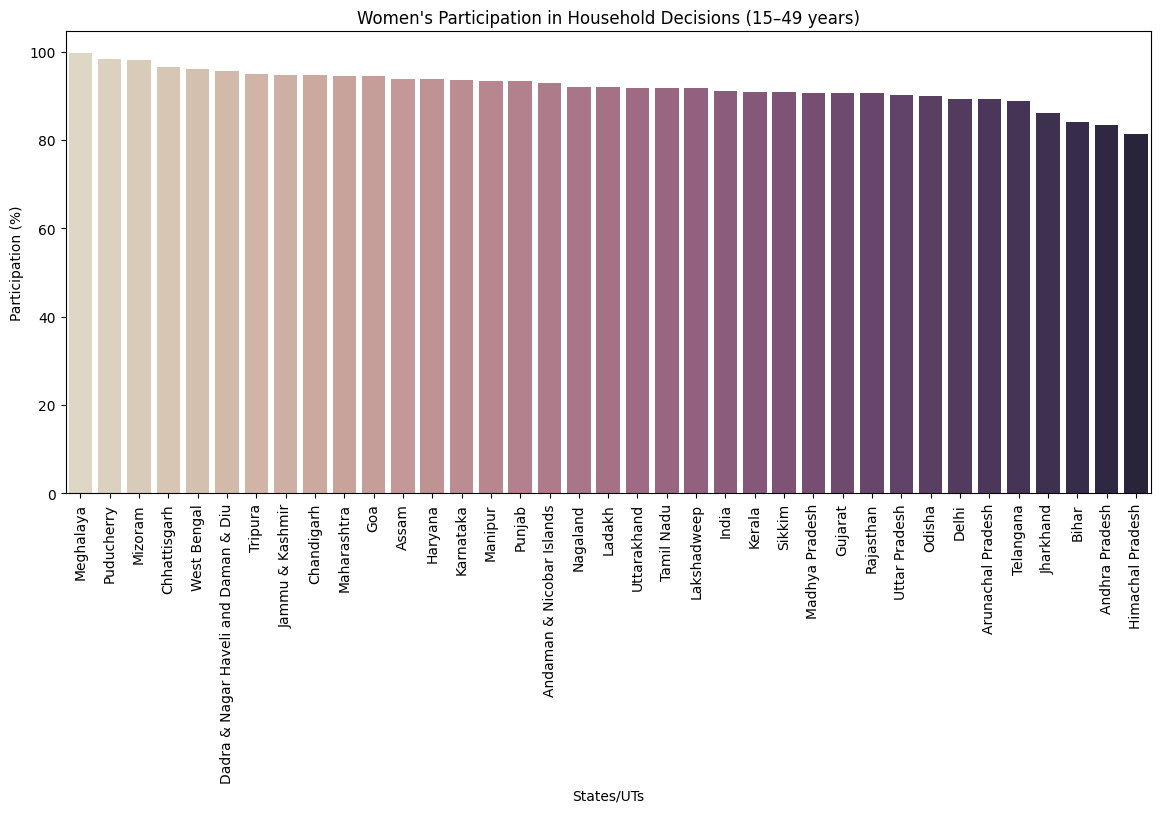

In [378]:
plt.figure(figsize=(14,6))
df_sorted = df_selected.drop_duplicates(subset="States/UTs").sort_values(
    "Currently married women (age 15-49 years) who usually participate in three household decisions25 (%)", ascending=False
)

sns.barplot(
    x="States/UTs",
    y="Currently married women (age 15-49 years) who usually participate in three household decisions25 (%)",
    data=df_sorted,
    palette="ch:s=-.2,r=.6"
)
plt.xticks(rotation=90)
plt.ylabel("Participation (%)")
plt.title("Women's Participation in Household Decisions (15–49 years)")
plt.show()


<Figure size 1500x600 with 0 Axes>

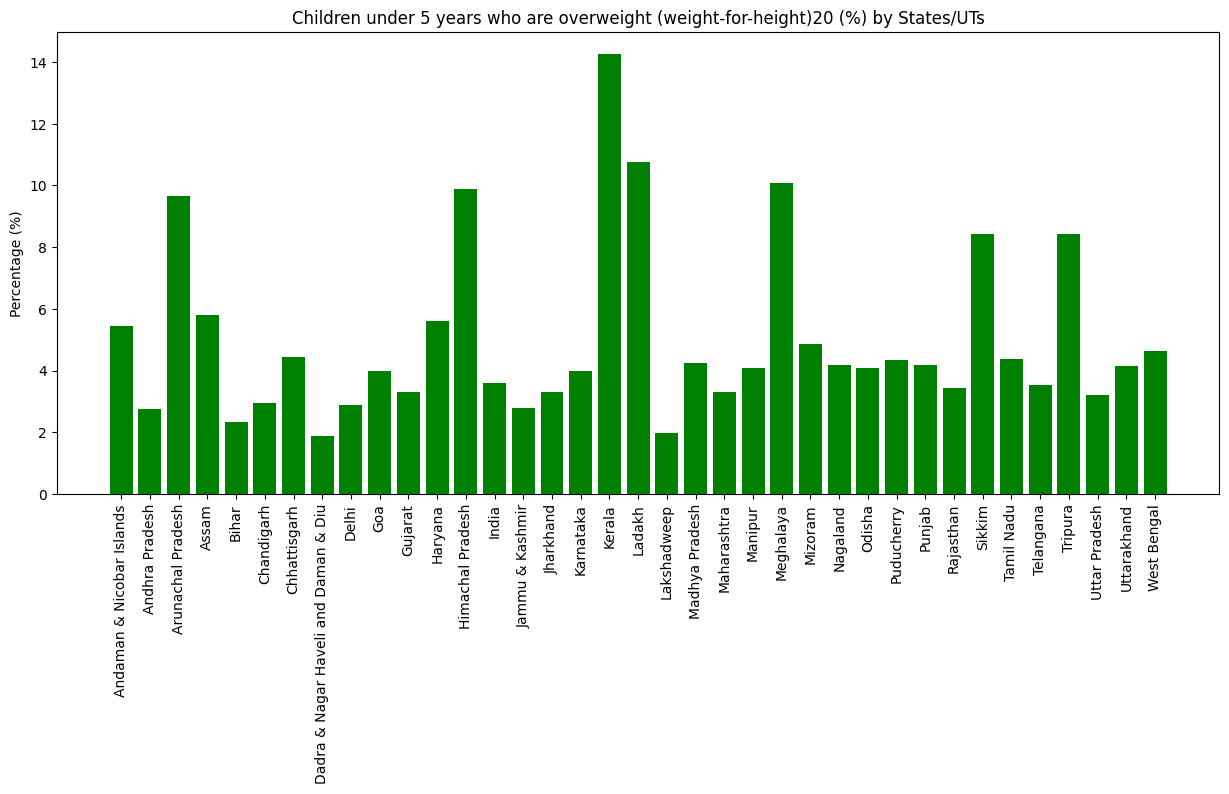

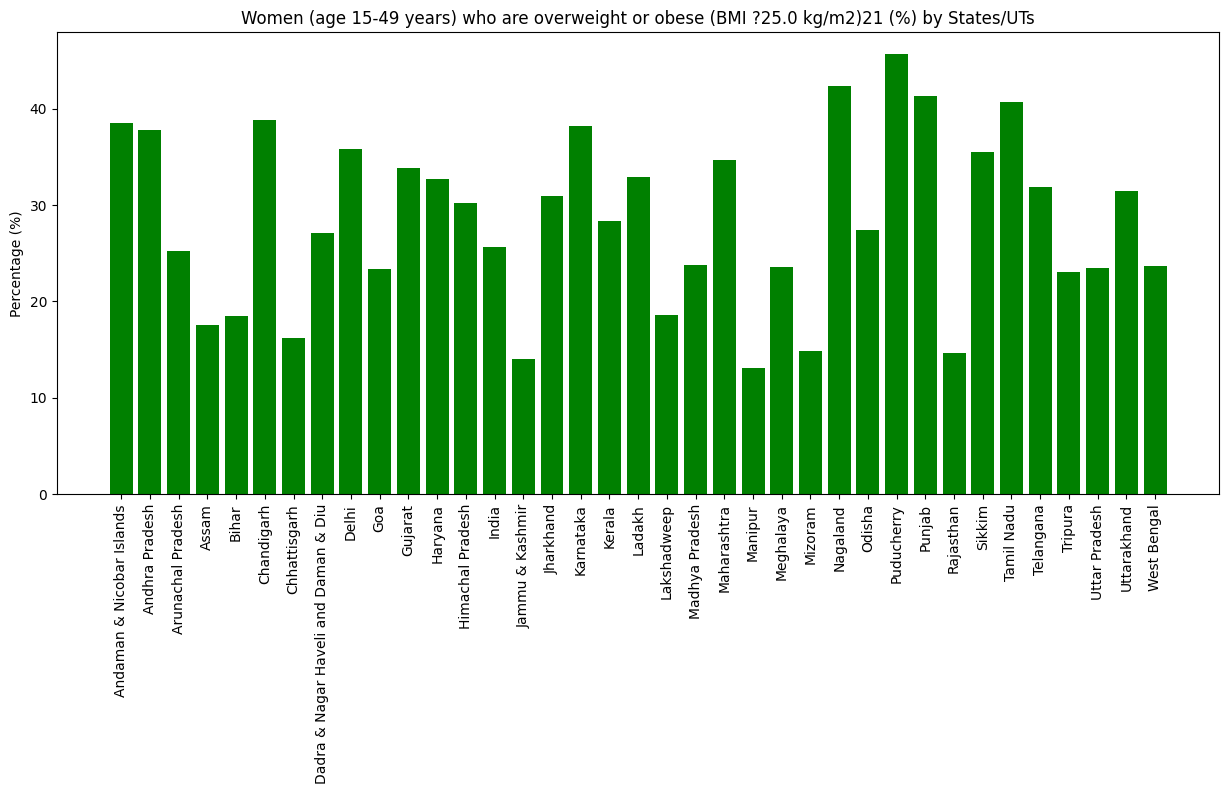

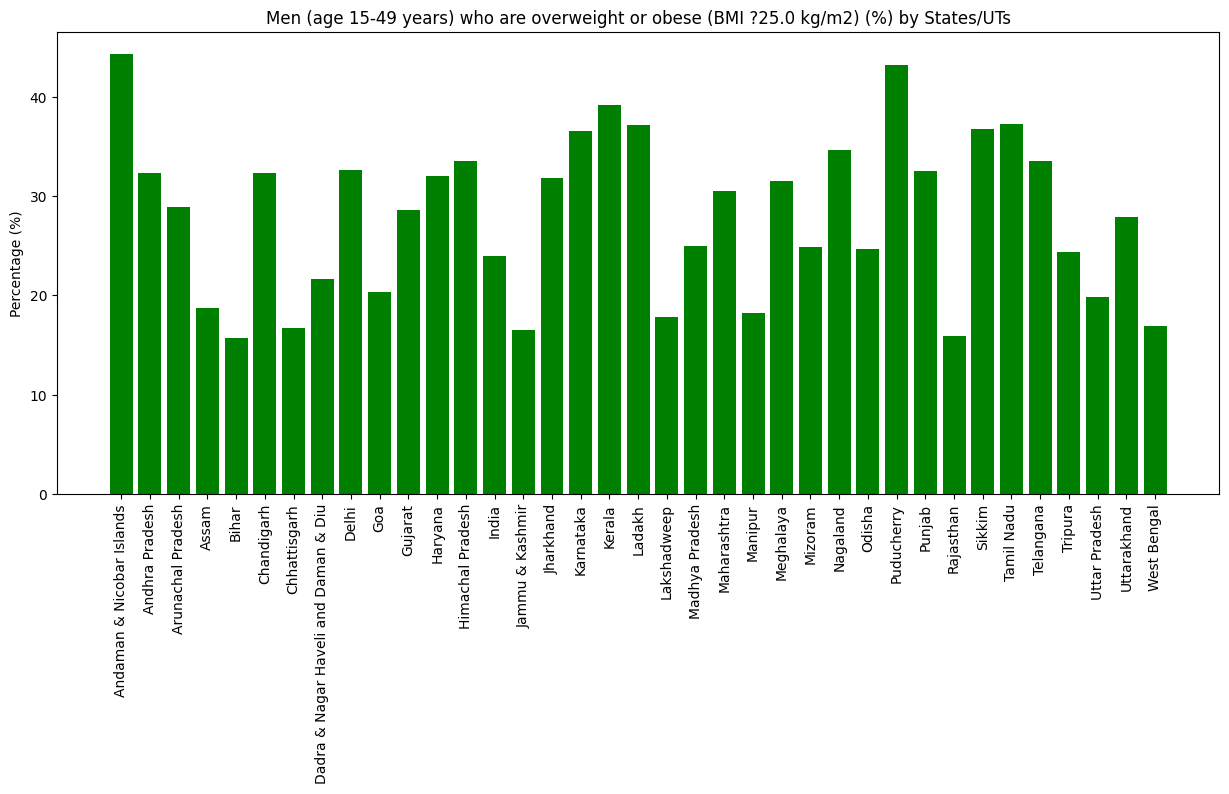

In [379]:
# 📌 Lifestyle Indicators Visualization

plt.figure(figsize=(15,6))

# Tobacco use (Men vs Women)
if "Men who use tobacco (%)" in df.columns and "Women who use tobacco (%)" in df.columns:
    df_lifestyle = df_selected.groupby("States/UTs")[["Men who use tobacco (%)", "Women who use tobacco (%)"]].mean().reset_index()

    df_lifestyle.plot(
        x="States/UTs",
        y=["Men who use tobacco (%)", "Women who use tobacco (%)"],
        kind="bar", figsize=(15,6)
    )
    plt.title("Tobacco Use among Men & Women by States/UTs")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=90)
    plt.show()

# Alcohol consumption (Men vs Women)
if "Men who consume alcohol (%)" in df_selected.columns and "Women who consume alcohol (%)" in df_selected.columns:
    df_alcohol = df_selected.groupby("States/UTs")[["Men who consume alcohol (%)", "Women who consume alcohol (%)"]].mean().reset_index()

    df_alcohol.plot(
        x="States/UTs",
        y=["Men who consume alcohol (%)", "Women who consume alcohol (%)"],
        kind="bar", figsize=(15,6), color=["blue", "pink"]
    )
    plt.title("Alcohol Consumption among Men & Women by States/UTs")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=90)
    plt.show()

# Obesity / Overweight (if present)
for col in df_selected.columns:
    if "obese" in col.lower() or "overweight" in col.lower():
        plt.figure(figsize=(15,6))
        df_obesity = df_selected.groupby("States/UTs")[col].mean().reset_index()
        plt.bar(df_obesity["States/UTs"], df_obesity[col], color="green")
        plt.title(f"{col} by States/UTs")
        plt.ylabel("Percentage (%)")
        plt.xticks(rotation=90)
        plt.show()
